In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score

In [ ]:
pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = (12, 6)

data = pd.read_csv("Phishing_Legitimate_full.csv")
data.rename(columns={'CLASS_LABEL': 'labels'}, inplace=True)
X = data.drop(['id', 'labels'], axis=1)
y = data['labels']

In [ ]:
discrete_features = X.dtypes == int
mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
mi_scores = pd.Series(mi_scores, name='MI Scores', index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

In [ ]:
top_n_features = mi_scores.head(32).index.tolist()
X = data[top_n_features]
y = data['labels']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [ ]:
dt_clf = DecisionTreeClassifier(max_depth=10)

dt_clf.fit(X_train, y_train)

y_pred_dt = dt_clf.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)

print("Decision Tree Classifier Results:")
print(f'Accuracy: {accuracy_dt}')
print(f'Precision: {precision_dt}')
print(f'Recall: {recall_dt}')
print(f'F1 Score: {f1_dt}')
print(f'Classification Report:\n{report_dt}')

Decision Tree Classifier Results:
Accuracy: 0.9675
Precision: 0.9655850540806293
Recall: 0.9703557312252964
F1 Score: 0.9679645145391819
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       988
           1       0.97      0.97      0.97      1012

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000



In [ ]:
from sklearn.naive_bayes import MultinomialNB

X_train += abs(X_train.min())
X_test += abs(X_test.min())

nb_clf = MultinomialNB()
nb_clf.fit(X_train, y_train)

y_pred_nb = nb_clf.predict(X_test)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)
report_nb = classification_report(y_test, y_pred_nb)

print("Naive Bayes Classifier Results:")
print(f'Accuracy: {accuracy_nb}')
print(f'Precision: {precision_nb}')
print(f'Recall: {recall_nb}')
print(f'F1 Score: {f1_nb}')
print(f'Classification Report:\n{report_nb}')

Naive Bayes Classifier Results:
Accuracy: 0.772
Precision: 0.7185534591194969
Recall: 0.9031620553359684
F1 Score: 0.8003502626970227
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.64      0.73       988
           1       0.72      0.90      0.80      1012

    accuracy                           0.77      2000
   macro avg       0.79      0.77      0.77      2000
weighted avg       0.79      0.77      0.77      2000



In [ ]:
log_reg = LogisticRegression(max_iter=10000)

# Train the logistic regression model
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_log = log_reg.predict(X_test)

# Evaluate the model
accuracy_log = accuracy_score(y_test, y_pred_log)
precision_log = precision_score(y_test, y_pred_log)
recall_log = recall_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log)
report_log = classification_report(y_test, y_pred_log)

print("Logistic Regression Results:")
print(f'Accuracy: {accuracy_log}')
print(f'Precision: {precision_log}')
print(f'Recall: {recall_log}')
print(f'F1 Score: {f1_log}')
print(f'Classification Report:\n{report_log}')

Logistic Regression Results:
Accuracy: 0.931
Precision: 0.9218146718146718
Recall: 0.9436758893280632
F1 Score: 0.9326171875
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       988
           1       0.92      0.94      0.93      1012

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000



In [ ]:
from sklearn.svm import SVC

# Initialize the Support Vector Classifier
svc = SVC(max_iter=10000)

# Train the Support Vector Classifier model
svc.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svc = svc.predict(X_test)

# Evaluate the model
accuracy_svc = accuracy_score(y_test, y_pred_svc)
precision_svc = precision_score(y_test, y_pred_svc)
recall_svc = recall_score(y_test, y_pred_svc)
f1_svc = f1_score(y_test, y_pred_svc)
report_svc = classification_report(y_test, y_pred_svc)

print("Support Vector Classifier Results:")
print(f'Accuracy: {accuracy_svc}')
print(f'Precision: {precision_svc}')
print(f'Recall: {recall_svc}')
print(f'F1 Score: {f1_svc}')
print(f'Classification Report:\n{report_svc}')

Support Vector Classifier Results:
Accuracy: 0.8475
Precision: 0.810359964881475
Recall: 0.9120553359683794
F1 Score: 0.8582054858205485
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.78      0.84       988
           1       0.81      0.91      0.86      1012

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=32)

# Train the Random Forest Classifier model
rf_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_clf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print("Random Forest Classifier Results:")
print(f'Accuracy: {accuracy_rf}')
print(f'Precision: {precision_rf}')
print(f'Recall: {recall_rf}')
print(f'F1 Score: {f1_rf}')
print(f'Classification Report:\n{report_rf}')

Random Forest Classifier Results:
Accuracy: 0.9835
Precision: 0.9822660098522168
Recall: 0.9851778656126482
F1 Score: 0.9837197829304392
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       988
           1       0.98      0.99      0.98      1012

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000



In [ ]:
log_reg = LogisticRegression(max_iter=10000)
svc_clf = SVC(probability=True)
dt_clf = DecisionTreeClassifier(max_depth=32)
nb_clf = MultinomialNB()

In [ ]:
voting_clf_soft = VotingClassifier(estimators=[('lr', log_reg), ('svc', svc_clf), ('dt', dt_clf), ('nb', nb_clf)], voting='soft')
voting_clf_soft.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=10000)),
                             ('svc', SVC(probability=True)),
                             ('dt', DecisionTreeClassifier(max_depth=32)),
                             ('nb', MultinomialNB())],
                 voting='soft')

In [ ]:
y_pred_soft = voting_clf_soft.predict(X_test)
accuracy_soft = accuracy_score(y_test, y_pred_soft)
precision_soft = precision_score(y_test, y_pred_soft)
recall_soft = recall_score(y_test, y_pred_soft)
f1_soft = f1_score(y_test, y_pred_soft)
report_soft = classification_report(y_test, y_pred_soft)

In [ ]:
print("Soft Voting Classifier Results:")
print(f'Accuracy: {accuracy_soft}')
print(f'Precision: {precision_soft}')
print(f'Recall: {recall_soft}')
print(f'F1 Score: {f1_soft}')
print(f'Classification Report:\n{report_soft}')

Soft Voting Classifier Results:
Accuracy: 0.935
Precision: 0.9224137931034483
Recall: 0.9515810276679841
F1 Score: 0.9367704280155642
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       988
           1       0.92      0.95      0.94      1012

    accuracy                           0.94      2000
   macro avg       0.94      0.93      0.93      2000
weighted avg       0.94      0.94      0.93      2000



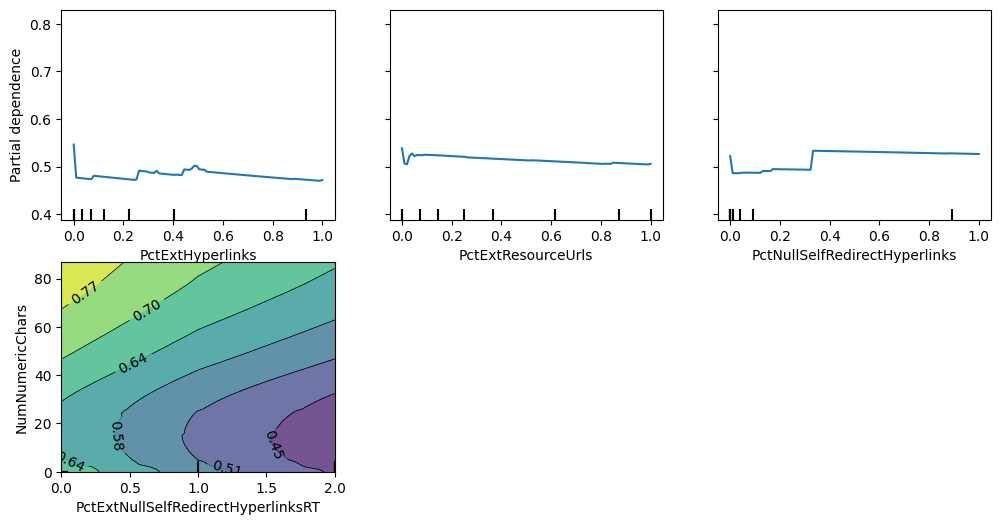

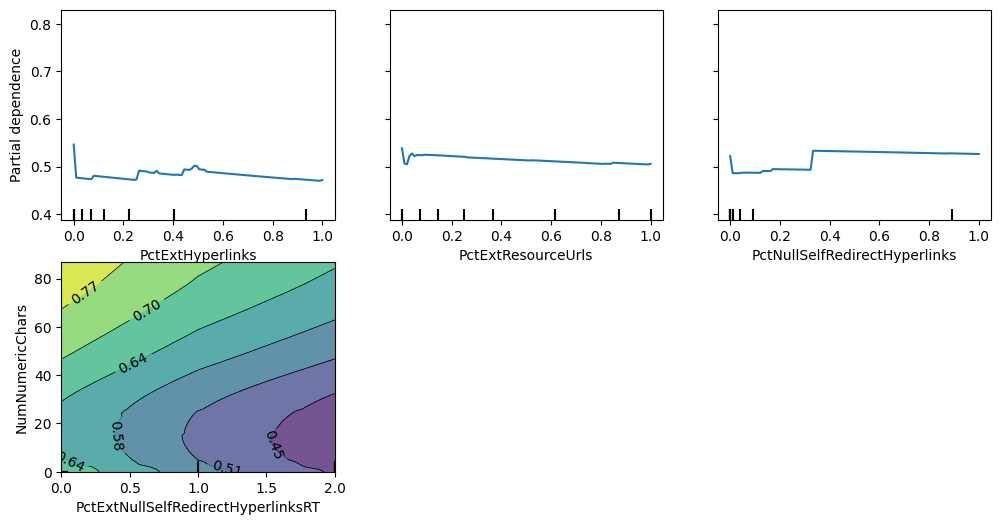

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Select the top 3 most important features for single plots and 2 for interaction plot
top_features = mi_scores.head(5).index.tolist()

# Fit the AdaBoost classifier (you already have this part)
voting_clf_soft.fit(X_train, y_train)

# Create and plot PartialDependenceDisplay with both single-feature and two-feature interaction
pdp_display = PartialDependenceDisplay.from_estimator(
    voting_clf_soft,
    X_train.sample(1000, random_state=42),
    features=[top_features[0], top_features[1], top_features[2], (top_features[3], top_features[4])],
    kind="average"
)

# Display the plots in a grid similar to the example
pdp_display.plot()
plt.show()


In [ ]:
import shap
from sklearn.model_selection import train_test_split

def explain_voting_clf_soft(data, top_n_features):
    top_n_features = mi_scores.sort_values(ascending=False).head(top_n_features).index.tolist()
    X = data[top_n_features]
    y = data['labels']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

    voting_clf_soft.fit(X_train, y_train)

    # Create a SHAP explainer object with feature names
    explainer = shap.Explainer(voting_clf_soft.predict_proba, feature_names=X_train.columns)

    # Calculate SHAP values
    shap_values = explainer.shap_values(X_test)

    # Plot the SHAP values
    shap.summary_plot(shap_values, X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


  0%|          | 0/100 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, 

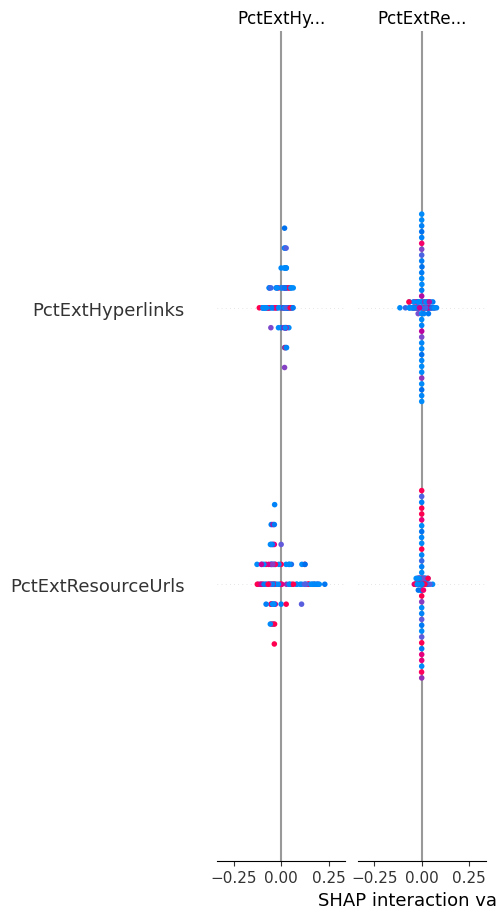

In [ ]:
import shap

# Create a SHAP explainer for the Voting Classifier
explainer = shap.KernelExplainer(voting_clf_soft.predict_proba, X_test.sample(100))  # Use a smaller sample size

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test.sample(100), nsamples=100)  # Use fewer samples for SHAP value calculation

# Create a SHAP summary plot
shap.summary_plot(shap_values, X_test.sample(100), plot_type="bar", show=False, max_display=10)  # Limit the number of features displayed


In [ ]:
# install required Python packages
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 11.1 MB/s eta 0:00:00


In [ ]:
import shap

In [ ]:
shap.initjs()

In [ ]:
X_test1=X_test.head(10)

In [ ]:
# Reduce the background data to 10 samples
background = shap.sample(X_train, 10)

# Initialize SHAP Explainer with the reduced background data
explainer = shap.KernelExplainer(voting_clf_soft.predict_proba, background)

# Calculate SHAP values for the test set
shap_values = explainer(X_test1)

# Plot SHAP values using Waterfall plot
shap.plots.waterfall(shap_values[0], max_display=10, show=True)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


  0%|          | 0/10 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but Decisi

ValueError: The waterfall plot can currently only plot a single explanation, but a matrix of explanations (shape (32, 2)) was passed! Perhaps try `shap.plots.waterfall(shap_values[0])` or for multi-output models, try `shap.plots.waterfall(shap_values[0, 0])`.

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=f906233b50263e21caafe03c838410bda64834e70028a743d40bda7b785304bc
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
from lime.lime_tabular import LimeTabularExplainer
# LIME
lime_explainer = LimeTabularExplainer(X_train.values, feature_names=top_n_features, class_names=['Phishing','Legitimate'], discretize_continuous=True)

exp = lime_explainer.explain_instance(X_test.iloc[0], voting_clf_soft.predict_proba, num_features=10)
exp.show_in_notebook(show_table=True)

/usr/local/lib/python3.10/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.10/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.10/dist-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

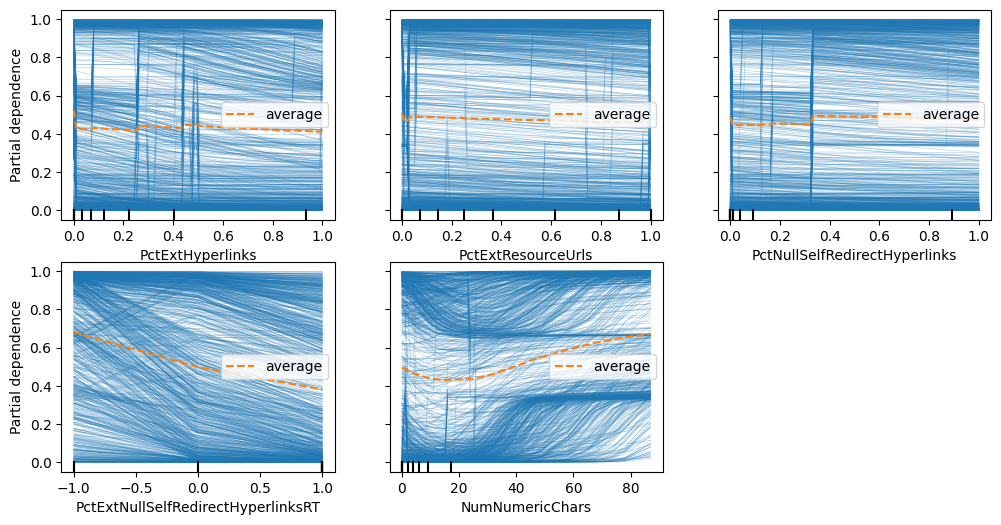

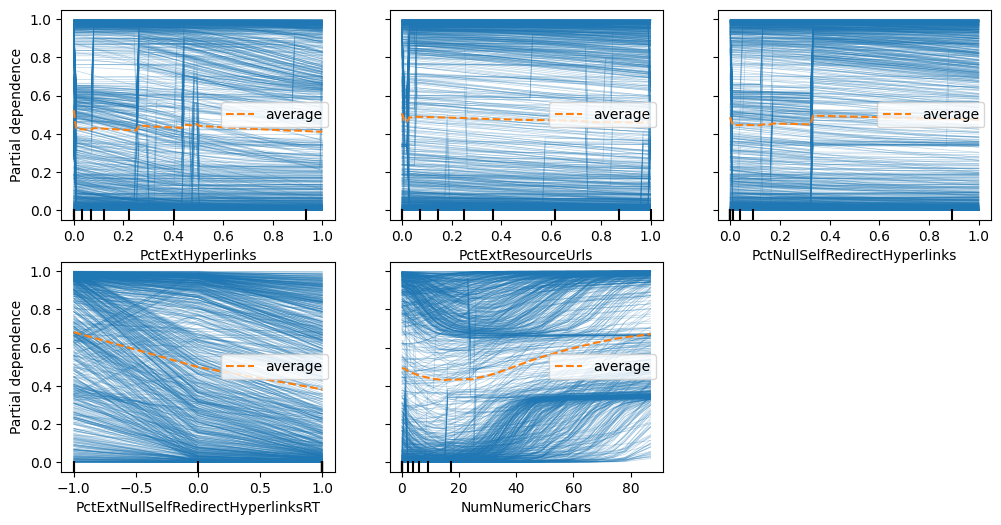

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

# Select the top 5 most important features
top_features = mi_scores.head(5).index.tolist()

# Fit the AdaBoost classifier (you already have this part)
voting_clf_soft.fit(X_train, y_train)

# Create a PartialDependenceDisplay object
pdp_display = PartialDependenceDisplay.from_estimator(
    voting_clf_soft, X_train.sample(1000, random_state=42), features=top_features, kind="both"
)

# Plot the partial dependence plots
fig, ax = plt.subplots(figsize=(12, 6))
pdp_display.plot(ax=ax)
plt.show()

In [ ]:
voting_clf_hard = VotingClassifier(estimators=[('lr', log_reg), ('svc', svc_clf), ('dt', dt_clf),('nb', nb_clf)], voting='hard')
voting_clf_hard.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=10000)),
                             ('svc', SVC(probability=True)),
                             ('dt', DecisionTreeClassifier(max_depth=32)),
                             ('nb', MultinomialNB())])

In [ ]:
y_pred_hard = voting_clf_hard.predict(X_test)
accuracy_hard = accuracy_score(y_test, y_pred_hard)
precision_hard = precision_score(y_test, y_pred_hard)
recall_hard = recall_score(y_test, y_pred_hard)
f1_hard = f1_score(y_test, y_pred_hard)
report_hard = classification_report(y_test, y_pred_hard)

In [ ]:
print("\nHard Voting Classifier Results:")
print(f'Accuracy: {accuracy_hard}')
print(f'Precision: {precision_hard}')
print(f'Recall: {recall_hard}')
print(f'F1 Score: {f1_hard}')
print(f'Classification Report:\n{report_hard}')


Hard Voting Classifier Results:
Accuracy: 0.933
Precision: 0.93812375249501
Recall: 0.9288537549407114
F1 Score: 0.9334657398212513
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       988
           1       0.94      0.93      0.93      1012

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000



In [ ]:
def predict_proba_hard(voting_clf, X):
    predictions = voting_clf.predict(X)
    probas = np.zeros((X.shape[0], 2))
    for i, pred in enumerate(predictions):
        probas[i, pred] = 1
    return probas

exp = lime_explainer.explain_instance(X_test.iloc[0], lambda x: predict_proba_hard(voting_clf_hard, x), num_features=32)
exp.show_in_notebook(show_table=True)

/usr/local/lib/python3.10/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.10/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.10/dist-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


  0%|          | 0/10 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but Decisi

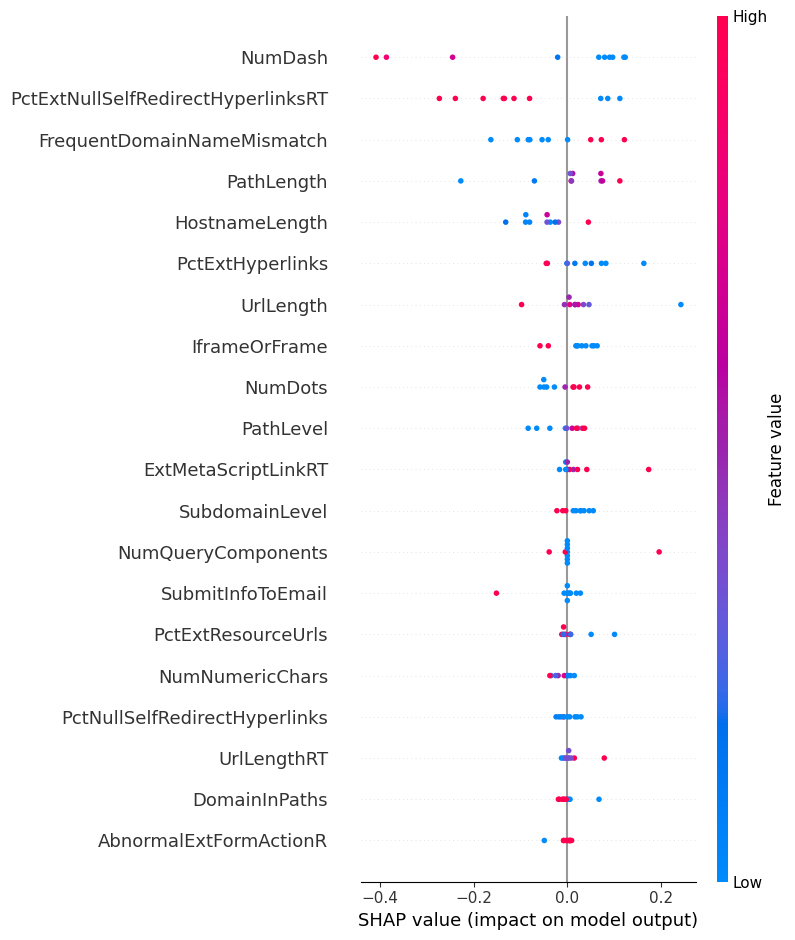

In [ ]:
# Reduce the background data to 10 samples
background = shap.sample(X_train, 10)

# Initialize SHAP Explainer with the reduced background data, use predict method instead of predict_proba
explainer = shap.KernelExplainer(voting_clf_hard.predict, background)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test1) # Use shap_values method instead of calling explainer directly

# Plot SHAP values
shap.summary_plot(shap_values, X_test1, feature_names=X.columns) # Pass feature names as keyword argument

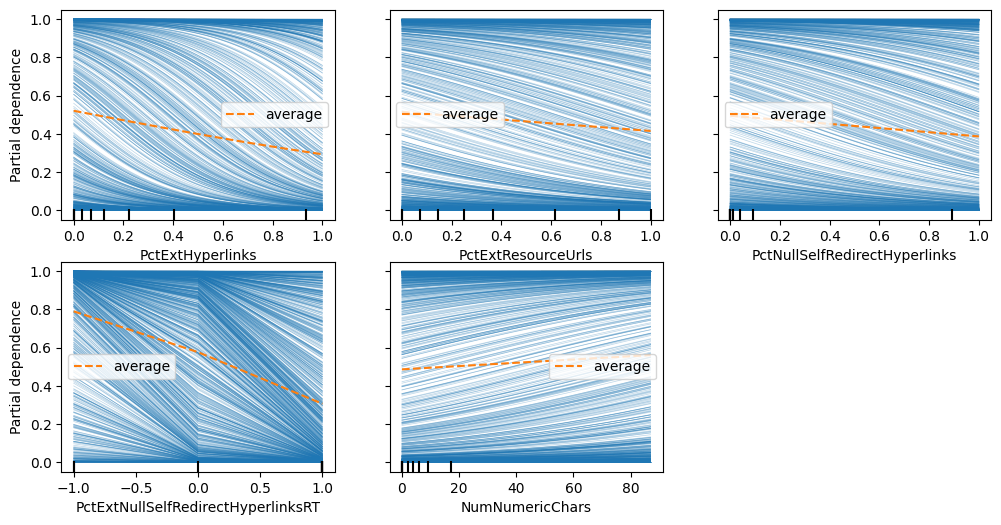

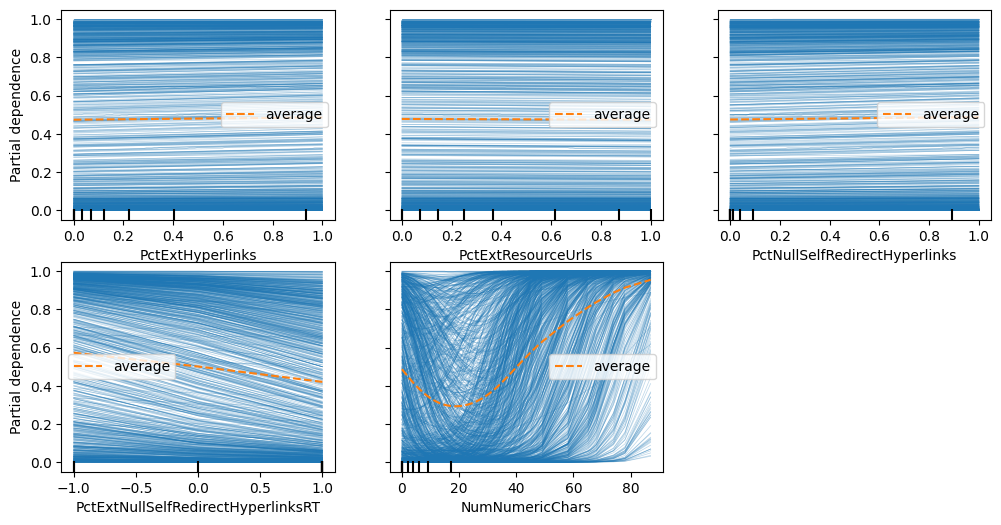

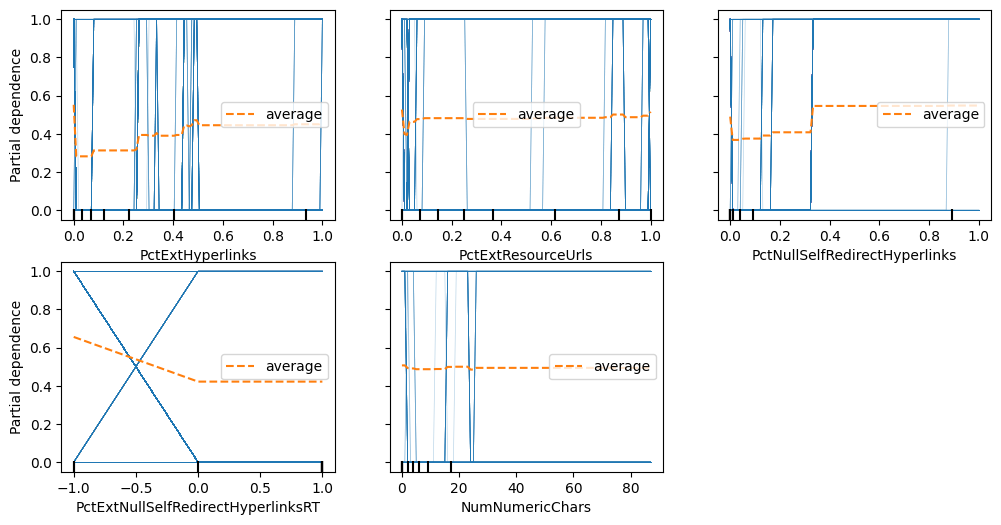

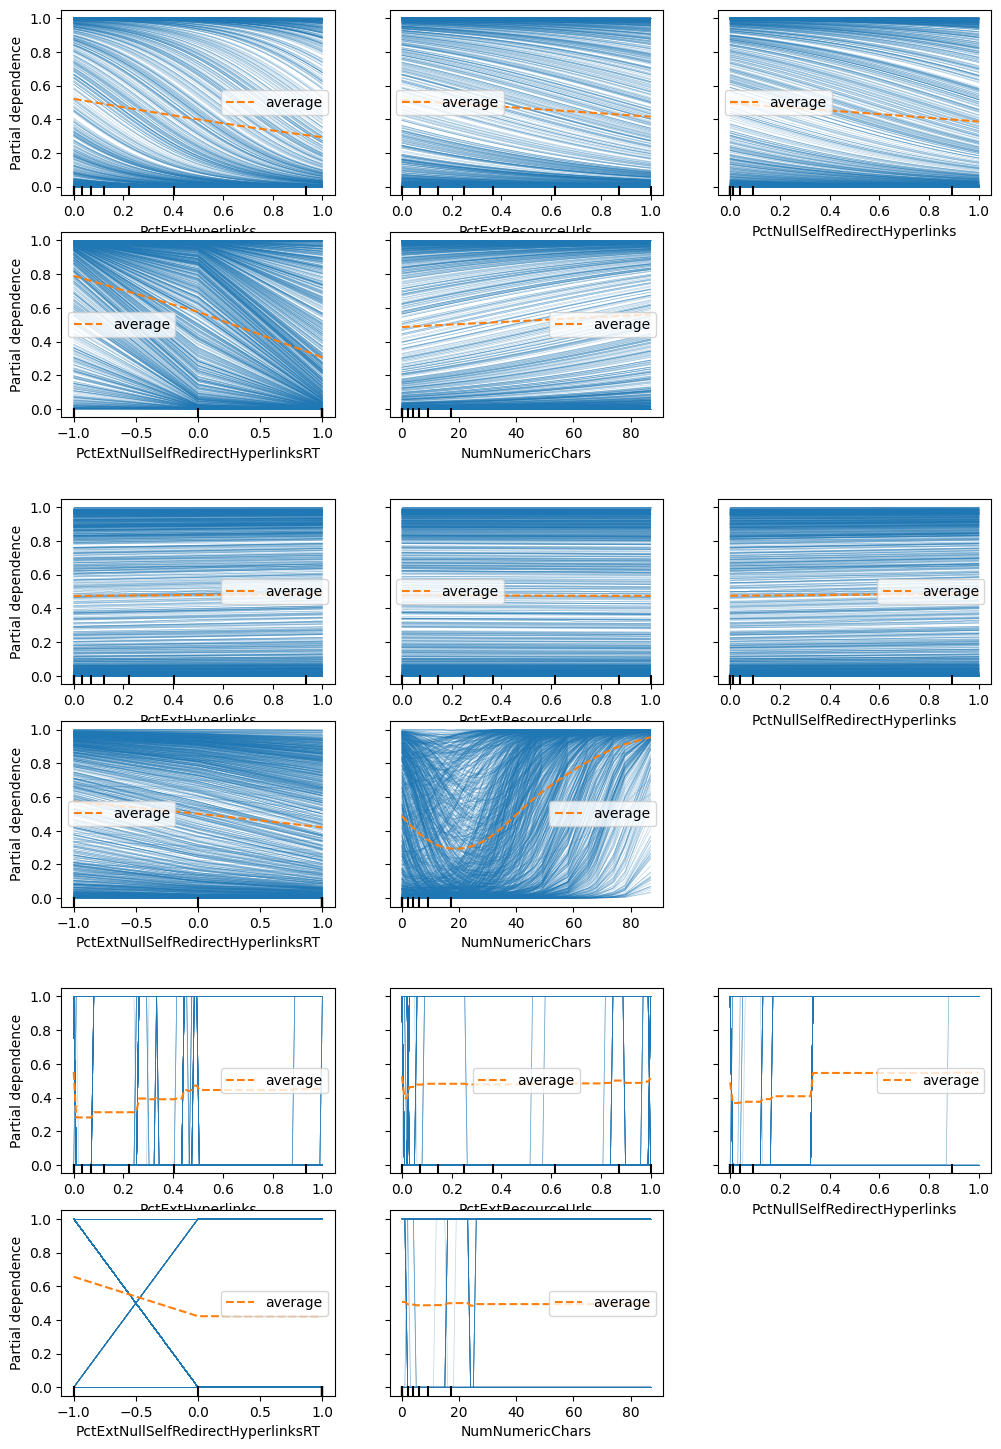

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

# Select the top 5 most important features
top_features = mi_scores.head(5).index.tolist()

# Fit the Hard Voting
voting_clf_hard.fit(X_train, y_train)

# Get the underlying estimators
estimators = voting_clf_hard.estimators_

# Create a list to store the PartialDependenceDisplay objects
pdp_displays = []

# Iterate over the underlying estimators
for estimator in estimators:
    # Create a PartialDependenceDisplay object for each estimator
    pdp_display = PartialDependenceDisplay.from_estimator(
        estimator, X_train.sample(1000, random_state=42), features=top_features, kind="both"
    )
    pdp_displays.append(pdp_display)

# Plot the partial dependence plots for each estimator
fig, ax = plt.subplots(nrows=len(estimators), ncols=1, figsize=(12, 6 * len(estimators)))
for i, pdp_display in enumerate(pdp_displays):
    pdp_display.plot(ax=ax[i])
plt.show()


In [ ]:
a